In [2]:
import csv
import numpy as np
from sklearn import cluster, covariance, manifold
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt 

In [3]:
# 从输入文件加载数据
input_file = 'E://tensorflow/jupyter/machine_learing_damo/4.data/wholesale.csv'
file_reader = csv.reader(open(input_file, 'rt'), delimiter=',')
X = []
for count, row in enumerate(file_reader):
    if not count:
        names = row[2:]
        continue
    X.append([float(x) for x in row[2:]])
    
# 转换为numpy数组
X = np.array(X) 

In [4]:
#建立一个均值漂移聚类模型
# 估计带宽参数bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.8, n_samples=len(X))
# 用MeanShift函数计算聚类
meanshift_estimator = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_estimator.fit(X)
labels = meanshift_estimator.labels_
centroids = meanshift_estimator.cluster_centers_
num_clusters = len(np.unique(labels))
print("\nNumber of clusters in input data =", num_clusters)


Number of clusters in input data = 8


In [5]:
print("\nCentroids of clusters:")
print('\t'.join([name[:3] for name in names]))
for centroid in centroids:
    print('\t'.join([str(int(x)) for x in centroid]))


Centroids of clusters:
Fre	Mil	Gro	Fro	Det	Del
9632	4671	6593	2570	2296	1248
40204	46314	57584	5518	25436	4241
112151	29627	18148	16745	4948	8550
36847	43950	20170	36534	239	47943
32717	16784	13626	60869	1272	5609
22925	73498	32114	987	20070	903
16117	46197	92780	1026	40827	2944
8565	4980	67298	131	38102	1215


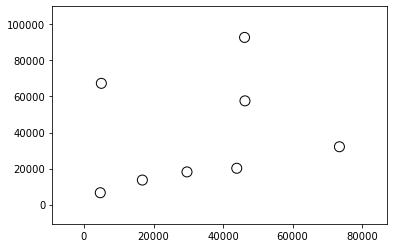

In [6]:
# 数据可视化
centroids_milk_groceries = centroids[:, 1:3]
# 用centroids_milk_groceries中的坐标画出中心点
plt.figure()
plt.scatter(centroids_milk_groceries[:,0], centroids_milk_groceries[:,1], s=100, edgecolors='k', facecolors='none')
offset = 0.2
plt.xlim(centroids_milk_groceries[:,0].min() - offset *
         centroids_milk_groceries[:,0].ptp(), centroids_milk_groceries[:,0].max() + offset *
         centroids_milk_groceries[:,0].ptp(),)
plt.ylim(centroids_milk_groceries[:,1].min() - offset * centroids_milk_groceries[:,1].ptp(),centroids_milk_groceries[:,1].max() + offset * 
        centroids_milk_groceries[:,1].ptp())
plt.show() 